In [1]:
# import dependencies
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

In [2]:
# read csvs into DF

org_profile = pd.read_csv('../Data/organization_profiles.csv')

tweets1 = pd.read_csv('../Data/tweets_all_revised2.csv')

# tweets2 = pd.read_excel('../Data/tweets_all_revised2.xlsx') # Not necessary

C:\Users\farha\anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3147: DtypeWarning: Columns (10,11,12,13) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
org_profile.head()

,Unnamed: 0,Organization Name,twitter_handle,screen_name,agency_catergory,followers_count,friends_count,location
0,0,Adults In Motion,@AIMkitchener,AIMkitchener,Disabilities,662,800,"Kitchener, Ontario"
1,1,African Family Revival Organization,@AFROKitchener,AFROKitchener,"Arts, Culture and Heritage",125,64,"Kitchener, Ontario"
2,2,Alzheimer Society of Waterloo Wellington,@alzsocww,alzsocww,Seniors,1376,432,"Waterloo Wellington, Ontario"
3,3,Big Brothers Big Sisters of Waterloo Region,@BBBSWR,BBBSWR,"Children, Youth and Family",2462,1551,Waterloo Region
4,4,Bridges to Belonging,@BtoBelonging,BtoBelonging,Disabilities,1432,1254,Waterloo Region


In [4]:
# value counts of agency category
org_profile['agency_catergory'].value_counts()

Community and Social Services        21
Arts, Culture and Heritage           11
Children, Youth and Family           10
Disabilities                         10
Sports, Recreation and Leisure        7
Health and Wellness                   4
Immigration and Settlement            3
Environment                           3
Grant-Giving Foundation               2
Animals                               2
Seniors                               2
Library and Research                  2
Education Institution                 2
Literacy and Skills Development       2
Employment                            2
Criminal Justice and Civil Rights     2
LGBTQ                                 1
Name: agency_catergory, dtype: int64

In [5]:
# followers grouped by agency category
followers_by_cat = org_profile.groupby(['agency_catergory']).sum()['followers_count']

Text(0.5, 0, 'Agency Categories')

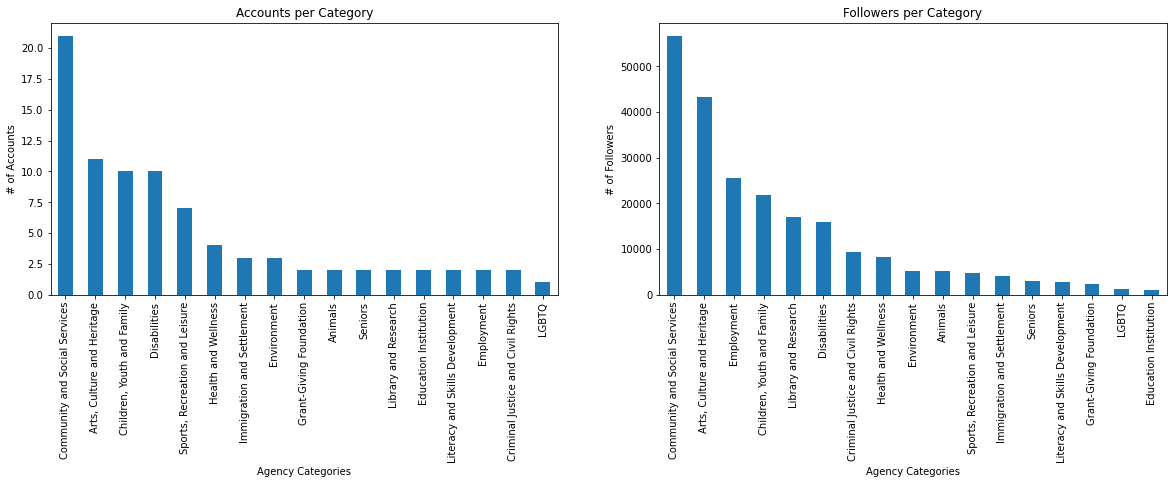

In [6]:
# Plot counts of agencies per category and sum of followers per category

fig, axes = plt.subplots(1, 2, figsize=(20, 5))

org_profile['agency_catergory'].value_counts().plot.bar(ax=axes[0])
followers_by_cat.sort_values(ascending=False).plot.bar(ax=axes[1])

axes[0].set_title('Accounts per Category')
axes[0].set_ylabel('# of Accounts')
axes[0].set_xlabel('Agency Categories')

axes[1].set_title('Followers per Category')
axes[1].set_ylabel('# of Followers')
axes[1].set_xlabel('Agency Categories')

In [7]:
# Sort (top 10) organizations by follower count in descending order

org_profile.sort_values('followers_count', ascending=False).head(10)

,Unnamed: 0,Organization Name,twitter_handle,screen_name,agency_catergory,followers_count,friends_count,location
74,74,Uptown Waterloo BIA,@uptownwaterloo,uptownwaterloo,Employment,25052,423,"Waterloo, ON"
81,81,The Museum,@THEMUSEUM,THEMUSEUM,"Arts, Culture and Heritage",18095,6858,"Kitchener, Ontario, Canada"
40,40,Kitchener Public Library,@KitchLibrary,KitchLibrary,Library and Research,12630,3035,"Kitchener, Ontario, Canada"
42,42,Kitchener-Waterloo Art Gallery,@kwartgallery,kwartgallery,"Arts, Culture and Heritage",10448,3119,"Kitchener, Canada"
23,23,Food Bank of Waterloo Region,@FoodBankWatReg,FoodBankWatReg,Community and Social Services,8886,2091,Waterloo Region
32,32,John Howard Society of Waterloo-Wellington,@jhsontario,jhsontario,Criminal Justice and Civil Rights,6972,2655,"Ontario, Canada"
28,28,House of Friendship,@hofwatreg,hofwatreg,Community and Social Services,6672,1071,"Kitchener Waterloo, Ontario"
45,45,Kitchener-Waterloo Symphony Volunteer Committee,@kw_symphony,kw_symphony,"Arts, Culture and Heritage",6663,2424,"Kitchener, Ontario"
35,35,KidsAbility Centre for Child Development,@KidsAbility,KidsAbility,Disabilities,6406,2277,Ontario
52,52,Mennonite Central Committee Ontario (MCC),@mccorg,mccorg,Community and Social Services,6098,293,NaN


In [8]:
# Correlation between followers and friends?

org_profile['followers_count'].corr(org_profile['friends_count'])

0.5501928382719242

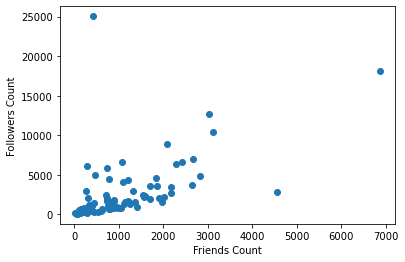

In [9]:
# plot the variables: followers as dependent(y-axis), friends as independent(x-axis)

plt.scatter(org_profile['friends_count'], org_profile['followers_count'])
plt.xlabel('Friends Count')
plt.ylabel('Followers Count')
plt.show()

## Regression model to test the correlation. Hypothesis: there is a random correlation between friends and followers

In [10]:
# Create the independent variable for the model
X = org_profile.friends_count.values.reshape(-1, 1)

In [11]:
X.shape

(86, 1)

In [12]:
# Create the dependent variable
y = org_profile.followers_count

In [13]:
# Create the model and fit it

model = LinearRegression()

In [14]:
model.fit(X, y)

LinearRegression()

In [15]:
y_pred = model.predict(X)
print(y_pred.shape)

(86,)


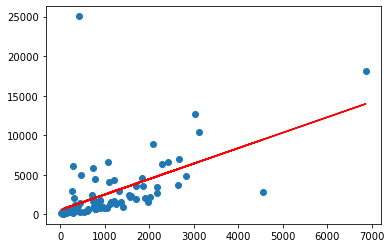

In [16]:
# plot the predictions
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

In [17]:
# Examine the parameters of the model: the slope and y-intercept
print(f'slope: {model.coef_}')
print(f'y-intercept: {model.intercept_}')

slope: [1.95612672]
y-intercept: 547.3888357821515


In [18]:
tweets1.head()

,tweet_id,user_id,created_at,screen_name,text,urls,favorite_count,retweet_count,URL,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name,text_clean
0,0,885747516,2021-02-26 17:59:51,AIMkitchener,🍅 What will your garden look like this year? 🪴...,['https://t.co/g1djW5JMVT'],2.0,0.0,https://twitter.com/i/web/status/1365360946378...,[],False,False,False,False,Adults In Motion,What will your garden look like this year \n...
1,1,885747516,2021-02-24 19:34:45,AIMkitchener,"Virtual connecting is not the next big thing, ...",['https://t.co/b1Ts6V60hS'],1.0,0.0,https://twitter.com/i/web/status/1364660054046...,[],False,False,False,False,Adults In Motion,Virtual connecting is not the next big thing i...
2,2,885747516,2021-02-15 18:14:22,AIMkitchener,“Treat your friends like family and your famil...,['https://t.co/jpFQ3K5oSK'],1.0,0.0,https://twitter.com/i/web/status/1361378331254...,[],False,False,False,False,Adults In Motion,“Treat your friends like family and your famil...
3,3,885747516,2021-02-01 17:54:56,AIMkitchener,🤗 Sending virtual Love Squeezes to anyone who ...,['https://t.co/zk4ZZm0cZa'],1.0,0.0,https://twitter.com/i/web/status/1356300010737...,"['VirtualHug', 'SpreadKindness', 'SpreadLove']",False,False,False,False,Adults In Motion,Sending virtual Love Squeezes to anyone who n...
4,4,885747516,2021-01-15 18:40:36,AIMkitchener,How are YOU getting active and outdoors?! Tell...,['https://t.co/eZB1kEPYUz'],1.0,0.0,NaN,[],True,False,False,False,Adults In Motion,How are YOU getting active and outdoors Tell u...


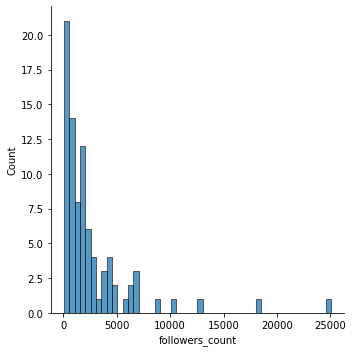

In [19]:
# Distribution of followers
sns.displot(org_profile['followers_count'], bins=50)

<AxesSubplot:xlabel='friends_count', ylabel='Count'>

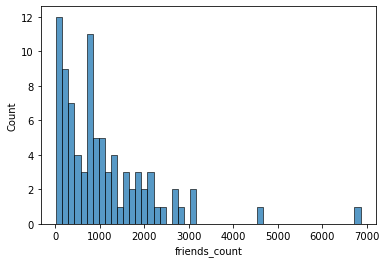

In [20]:
# plot distribution of friends
sns.histplot(org_profile['friends_count'], bins=50)

In [21]:
# Get the value count of favorites
fav_count = pd.Series(tweets1['favorite_count'].value_counts())
fav_count

0.0      107645
1.0       25732
2.0       14643
3.0        9522
4.0        6497
          ...  
578.0         1
283.0         1
203.0         1
192.0         1
79.0          1
Name: favorite_count, Length: 121, dtype: int64

Text(0.5, 1.0, 'Frequency of Favorites')

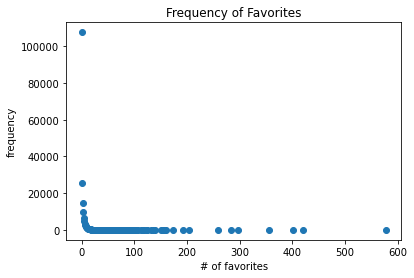

In [22]:
# Plot favorites
plt.scatter(x=fav_count.index, y=fav_count)
plt.xlabel('# of favorites')
plt.ylabel('frequency')
plt.title('Frequency of Favorites')

In [23]:
# Get the value count of retweets
retweet_count = pd.Series(tweets1['retweet_count'].value_counts())
retweet_count

0.0         67558
1.0         40372
2.0         23973
3.0         14756
4.0          9257
            ...  
5205.0          1
325.0           1
927427.0        1
5197.0          1
503.0           1
Name: retweet_count, Length: 1045, dtype: int64

Text(0.5, 1.0, 'Frequency of retweets')

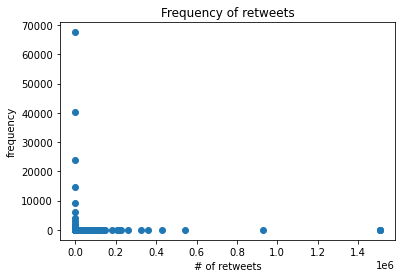

In [24]:
# Plot retweets
plt.scatter(retweet_count.index, retweet_count)
plt.xlabel('# of retweets')
plt.ylabel('frequency')
plt.title('Frequency of retweets')

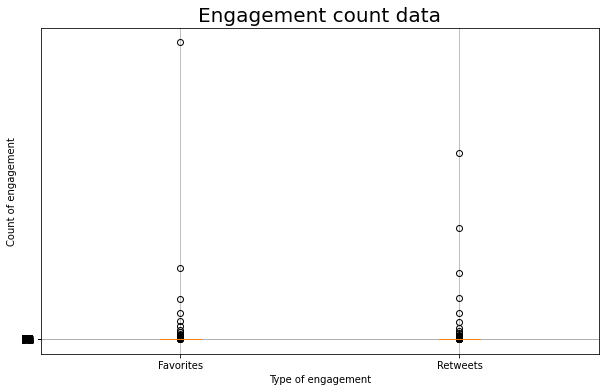

In [32]:
# Create a box plot of favorites and retweets
x_labels = ['Favorites', 'Retweets']
engagement_count_data = [fav_count, retweet_count]
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_title('Engagement count data', fontsize=20)
ax.set_ylabel('Count of engagement')
ax.set_xlabel('Type of engagement')
ax.boxplot(engagement_count_data, labels=x_labels)
ax.set_yticks(np.arange(0, 100))
ax.grid()

In [36]:
# check data of the outliers in favorite count
tweets1[tweets1['favorite_count'] > 300]

,tweet_id,user_id,created_at,screen_name,text,urls,favorite_count,retweet_count,URL,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name,text_clean
88051,88055,425118862,2021-01-19 16:34:03,KitchLibrary,"It's official! No more overdue fines, ever! 🙌🥳...",['https://t.co/SVlWM83PLJ'],578.0,142.0,https://twitter.com/i/web/status/1351568617226...,[],False,False,False,False,Kitchener Public Library,Its official No more overdue fines ever \n\nWe...
88089,88093,425118862,2021-01-11 15:45:09,KitchLibrary,Be careful what you wish for 😉\n\nPictured: 85...,['https://t.co/aPCfFSemz0'],355.0,23.0,https://twitter.com/i/web/status/1348657207932...,[],False,False,False,False,Kitchener Public Library,Be careful what you wish for \n\nPictured 85 i...
89111,89115,425118862,2020-03-22 18:01:04,KitchLibrary,Thank you to everyone who reached out to us ab...,['https://t.co/qy3U6EBYvU'],420.0,76.0,https://twitter.com/i/web/status/1241786989168...,['kwawesome'],False,True,False,False,Kitchener Public Library,Thank you to everyone who reached out to us ab...
89562,89566,425118862,2019-11-04 14:51:57,KitchLibrary,Access to menstrual products just got a little...,['https://t.co/ubab4HOStJ'],401.0,67.0,https://twitter.com/i/web/status/1191367483363...,[],False,False,False,False,Kitchener Public Library,Access to menstrual products just got a little...


In [33]:
# check the outlier in retweet count
tweets1[tweets1['retweet_count'] > 900000]

,tweet_id,user_id,created_at,screen_name,text,urls,favorite_count,retweet_count,URL,hashtags,has_media,is_quote,is_reply,is_retweet,Organization Name,text_clean
2040,2040,756239429904334848,2017-08-17 20:13:51,AFROKitchener,"RT @BarackObama: ""No one is born hating anothe...",['https://t.co'],0.0,1506563.0,NaN,[],False,False,False,True,African Family Revival Organization,No one is born hating another person because o...
34308,34308,237301381,2017-08-17 02:08:05,ajustcommunity,"RT @BarackObama: ""No one is born hating anothe...",['https://t.co'],0.0,1506561.0,NaN,[],False,False,False,True,Community Justice Initiatives,No one is born hating another person because o...
47716,47718,930117559,2017-08-16 03:30:15,EAFWR,"RT @BarackObama: ""No one is born hating anothe...",['https://t.co'],0.0,1506560.0,NaN,[],False,False,False,True,Extend-A-Family Waterloo Region,No one is born hating another person because o...
104713,104717,1390797326,2018-06-01 17:18:28,KWMLA,RT @RandallTime: If the Cleveland Cavaliers wi...,[],0.0,927427.0,NaN,[],False,False,False,True,KW Minor Lacrosse Association,If the Cleveland Cavaliers win the 2018 NBA fi...
